In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***`LIBRARIES`***

In [7]:
%matplotlib inline
!pip install --upgrade scikit-learn
!pip install category_encoders
!pip install joblib
!pip install scipy
!pip install --upgrade scikit-learn xgboost

  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0

In [8]:
!pip install scikeras # Install scikeras
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras

from sklearn.metrics import make_scorer, accuracy_score # Import make_scorer and accuracy_score
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import recall_score, classification_report, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize
import sklearn
import xgboost

# ***`READ DATA`***

In [10]:
excel_file_path = "/content/drive/My Drive/Colab Notebooks/NCKH (Mr. Hiếu)/CleanedData.xlsx"
df = pd.read_excel(excel_file_path)

In [11]:
column_to_analyze = ["Gender", "YearOfLearning", "UniversityName", "Major", "GradeRank", "UseGPT?", "GradeTrend(GPT)",
                    "UsageInAcademics", "UsageBeyondAcademics", "AvgTimeUsage(1day)", "Priority", "Reliability", "ResultofGPT",
                    "InfluenceofGPT", "SatisfactionLevel", "Relevance", "Inspire&Motivate",
                    "PositiveInfluence", "NegativeInfluence", "Effective", "ReplaceTeacher",
                    "SpeechDoExam", "Dependence&Constraint", "LazyStudy&Think", "ImproveStudy",
                    "SatisfiedResult", "MechanismOfAction", "EasyToUnderstand", "CompareGoogle",
                    "FindJob", "WaytoAsk"]
df_copy = df[column_to_analyze]
df_copy.keys()

Index(['Gender', 'YearOfLearning', 'UniversityName', 'Major', 'GradeRank',
       'UseGPT?', 'GradeTrend(GPT)', 'UsageInAcademics',
       'UsageBeyondAcademics', 'AvgTimeUsage(1day)', 'Priority', 'Reliability',
       'ResultofGPT', 'InfluenceofGPT', 'SatisfactionLevel', 'Relevance',
       'Inspire&Motivate', 'PositiveInfluence', 'NegativeInfluence',
       'Effective', 'ReplaceTeacher', 'SpeechDoExam', 'Dependence&Constraint',
       'LazyStudy&Think', 'ImproveStudy', 'SatisfiedResult',
       'MechanismOfAction', 'EasyToUnderstand', 'CompareGoogle', 'FindJob',
       'WaytoAsk'],
      dtype='object')

# ***`Missing Values`***

In [12]:
null_values = df_copy.isnull().sum()
null_values

,0
Gender,0
YearOfLearning,0
UniversityName,0
Major,0
GradeRank,0
UseGPT?,0
GradeTrend(GPT),0
UsageInAcademics,0
UsageBeyondAcademics,0
AvgTimeUsage(1day),0


In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 857 non-null    object
 1   YearOfLearning         857 non-null    int64 
 2   UniversityName         857 non-null    object
 3   Major                  857 non-null    object
 4   GradeRank              857 non-null    int64 
 5   UseGPT?                857 non-null    int64 
 6   GradeTrend(GPT)        857 non-null    int64 
 7   UsageInAcademics       857 non-null    int64 
 8   UsageBeyondAcademics   857 non-null    int64 
 9   AvgTimeUsage(1day)     857 non-null    int64 
 10  Priority               857 non-null    int64 
 11  Reliability            857 non-null    int64 
 12  ResultofGPT            857 non-null    int64 
 13  InfluenceofGPT         857 non-null    int64 
 14  SatisfactionLevel      857 non-null    int64 
 15  Relevance              

# **`Encoding`**

In [14]:
df_copy.head(2)

,Gender,YearOfLearning,UniversityName,Major,GradeRank,UseGPT?,GradeTrend(GPT),UsageInAcademics,UsageBeyondAcademics,AvgTimeUsage(1day),...,SpeechDoExam,Dependence&Constraint,LazyStudy&Think,ImproveStudy,SatisfiedResult,MechanismOfAction,EasyToUnderstand,CompareGoogle,FindJob,WaytoAsk
0,Nữ,2,Đại học Công nghệ TP.HCM (HUTECH),Công nghệ thông tin,5,1,3,5,5,1,...,1,3,3,3,3,3,3,Google,3,3
1,Nam,4,Đại học Công nghệ TP.HCM (HUTECH),Công nghệ thông tin,5,1,3,4,5,1,...,1,4,5,5,4,5,4,ChatGPT,4,5


In [15]:
encoder_features = ['Gender', 'UniversityName', 'Major', 'CompareGoogle']

for feature in encoder_features:
    label_encoding = LabelEncoder()
    df_copy[feature] = label_encoding.fit_transform(df_copy[feature])

<ipython-input-15-befa9dd68920>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[feature] = label_encoding.fit_transform(df_copy[feature])
<ipython-input-15-befa9dd68920>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[feature] = label_encoding.fit_transform(df_copy[feature])
<ipython-input-15-befa9dd68920>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

# ***`VIF`***

In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # Import the function

# Thêm hằng số (constant) vào dữ liệu để sử dụng VIF
X = sm.add_constant(df_copy.drop(columns=['UseGPT?'])) # Use sm.add_constant
# Convert all columns to numeric if possible, otherwise handle non-numeric columns
X = X.apply(pd.to_numeric, errors='coerce') # Convert to numeric, replace errors with NaN
X = X.dropna(axis=1) # Drop columns with NaNs (non-numeric)

# Tính toán VIF cho từng biến
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Hiển thị kết quả
print(vif_data)

                 Variable        VIF
0                   const  58.908515
1                  Gender   1.131370
2          YearOfLearning   1.109460
3          UniversityName   1.041484
4                   Major   1.115051
5               GradeRank   1.078031
6         GradeTrend(GPT)   1.155358
7        UsageInAcademics   3.004551
8    UsageBeyondAcademics   2.543464
9      AvgTimeUsage(1day)   1.460179
10               Priority   1.733214
11            Reliability   2.559657
12            ResultofGPT   3.350090
13         InfluenceofGPT   2.220743
14      SatisfactionLevel   3.634143
15              Relevance   2.869275
16       Inspire&Motivate   2.456908
17      PositiveInfluence   2.560764
18      NegativeInfluence   1.633412
19              Effective   2.814861
20         ReplaceTeacher   1.598540
21           SpeechDoExam   1.571738
22  Dependence&Constraint   1.762672
23        LazyStudy&Think   1.560838
24           ImproveStudy   2.605193
25        SatisfiedResult   2.683509
2

# ***`Check Unballance Target features`***

In [17]:
df_copy['AvgTimeUsage(1day)'] = df_copy['AvgTimeUsage(1day)'] - 1

<ipython-input-17-901f6aa501fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['AvgTimeUsage(1day)'] = df_copy['AvgTimeUsage(1day)'] - 1


In [18]:
pd.crosstab(df_copy['AvgTimeUsage(1day)'],df_copy['AvgTimeUsage(1day)'], normalize='all')*100

AvgTimeUsage(1day),0,1,2,3
AvgTimeUsage(1day),,,,
0,66.97783,0.000000,0.000000,0.000000
1,0.00000,23.687281,0.000000,0.000000
2,0.00000,0.000000,5.600933,0.000000
3,0.00000,0.000000,0.000000,3.733956


In [19]:
# Shuffle toàn bộ DataFrame
df_copy = df_copy.sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
X = df_copy.drop(columns = ['AvgTimeUsage(1day)'])
y = df_copy['AvgTimeUsage(1day)']

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cb1c58f8700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


# ***`Train/Test Split`***

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [23]:
train_class_counts = pd.Series(y_train).value_counts()

# Đếm số lượng các lớp trong y_test
test_class_counts = pd.Series(y_test).value_counts()

# In kết quả
print("Train Class Counts:")
print(train_class_counts)

print("\nTest Class Counts:")
print(test_class_counts)

Train Class Counts:
AvgTimeUsage(1day)
1    414
3    405
2    395
0    393
Name: count, dtype: int64

Test Class Counts:
AvgTimeUsage(1day)
0    181
2    179
3    169
1    160
Name: count, dtype: int64


# ***`Normalization`***

In [24]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [26]:
X_train_scaled.head()

,Gender,YearOfLearning,UniversityName,Major,GradeRank,UseGPT?,GradeTrend(GPT),UsageInAcademics,UsageBeyondAcademics,Priority,...,SpeechDoExam,Dependence&Constraint,LazyStudy&Think,ImproveStudy,SatisfiedResult,MechanismOfAction,EasyToUnderstand,CompareGoogle,FindJob,WaytoAsk
0,1.0,0.75,0.421053,0.633333,0.833333,1.0,1.0,0.75,0.75,0.0,...,0.333333,0.50,0.50,0.50,0.50,0.50,0.50,1.000000,0.50,0.50
1,0.5,0.25,0.236842,0.041667,0.666667,1.0,1.0,1.00,0.25,1.0,...,0.666667,0.75,0.25,0.75,0.75,0.25,0.75,1.000000,1.00,0.75
2,1.0,0.25,0.421053,0.400000,0.666667,0.0,0.5,0.00,0.00,0.0,...,0.333333,0.25,0.25,0.50,0.25,0.25,0.25,1.000000,0.50,0.50
3,1.0,0.25,0.421053,0.633333,0.500000,1.0,1.0,0.50,0.50,0.0,...,0.333333,0.50,0.50,0.50,0.50,0.50,0.50,0.333333,0.50,0.25
4,0.5,0.75,0.184211,0.366667,0.666667,0.0,0.0,1.00,0.00,0.5,...,0.000000,0.00,0.00,0.25,0.25,0.25,0.50,0.666667,0.25,0.25


In [27]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


# ***`Random Forest`***

In [ ]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
expected = y_test
predicted = RF_classifier.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_RF= metrics.confusion_matrix(expected, predicted)
print(cm_RF)

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       181
           1       0.73      0.92      0.82       160
           2       0.95      0.97      0.96       179
           3       0.95      0.98      0.97       169

    accuracy                           0.89       689
   macro avg       0.90      0.89      0.88       689
weighted avg       0.90      0.89      0.89       689

[[125  45   7   4]
 [  6 147   3   4]
 [  1   5 173   0]
 [  0   3   0 166]]


Text(0.5, 1.0, 'Confusion Matrix')

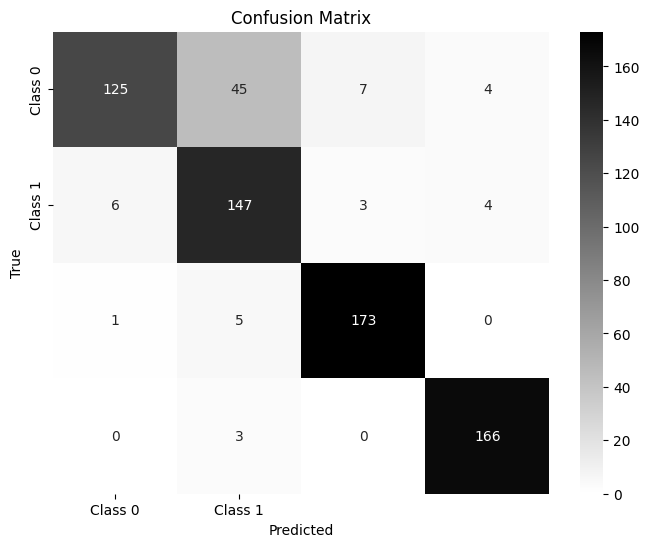

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt="d", cmap="binary", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# ***`Grid Search for Random Forest `***


In [ ]:
param_grid = {
    'n_estimators': [10,25,30,50,100,200],
    'max_depth': [2,3,5,10,20],
    'criterion':['entropy','gini'],
    'min_samples_leaf': [5,10,20,50,100,200],
    'min_samples_split': [2, 5, 10],
}

# Tạo đối tượng GridSearchCV
grid_search_RF = GridSearchCV(estimator=RF_classifier,
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv = 5,
                           verbose=1,
                           scoring="accuracy")

grid_search_RF.fit(X_train_scaled, y_train)
grid_search_RF.best_estimator_

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=200)

In [ ]:
expected = y_test
predicted = grid_search_RF.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.92      0.61      0.74       181
           1       0.71      0.91      0.79       160
           2       0.91      0.93      0.92       179
           3       0.91      0.97      0.94       169

    accuracy                           0.85       689
   macro avg       0.86      0.85      0.85       689
weighted avg       0.86      0.85      0.85       689

[[111  50  12   8]
 [  5 145   3   7]
 [  5   7 166   1]
 [  0   3   2 164]]


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

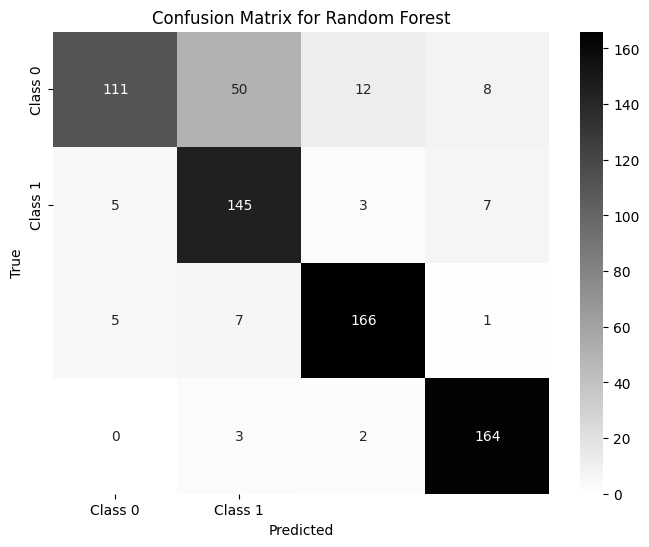

In [ ]:
# Vẽ ma trận nhầm lẫn dưới dạng hình ảnh đen trắng, đáp ứng yêu cầu bài báo
plt.figure(figsize=(8, 6))
sns.heatmap(cm_grid_search_RF, annot=True, fmt="d", cmap="binary", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')

# ***`Logistic Regression`***

In [ ]:
!pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=3cda33790b54f7b6dc34fa5987f2116522eb7984f2d8ca5e0158c34e3d20b296
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


In [ ]:
from sklearn.linear_model import LogisticRegression

# Tạo và huấn luyện mô hình Logistic Regression
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_scaled, y_train)

expected = y_test
predicted = LR_model.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_LR= metrics.confusion_matrix(expected, predicted)
print(cm_LR)

              precision    recall  f1-score   support

           0       0.71      0.62      0.66       181
           1       0.53      0.57      0.55       160
           2       0.60      0.49      0.54       179
           3       0.55      0.69      0.61       169

    accuracy                           0.59       689
   macro avg       0.60      0.59      0.59       689
weighted avg       0.60      0.59      0.59       689

[[112  42  11  16]
 [ 23  92  19  26]
 [ 16  24  87  52]
 [  7  17  29 116]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# ***`Grid Search for Logistic Regression`***

In [ ]:
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the GridSearchCV object
grid_search_LR = GridSearchCV(estimator=LR_model, param_grid=param_grid_LR, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_LR.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_LR.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search_LR.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search_LR.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 59.93%
Test Accuracy: 58.06%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
expected = y_test
predicted = grid_search_LR.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.71      0.59      0.64       181
           1       0.51      0.56      0.53       160
           2       0.57      0.43      0.49       179
           3       0.55      0.75      0.64       169

    accuracy                           0.58       689
   macro avg       0.59      0.58      0.58       689
weighted avg       0.59      0.58      0.58       689

[[107  44  13  17]
 [ 25  89  21  25]
 [ 14  27  77  61]
 [  5  14  23 127]]


# **`SVM`**

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
expected = y_test
predicted = svm_classifier.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.86      0.68      0.76       181
           1       0.69      0.81      0.75       160
           2       0.89      0.89      0.89       179
           3       0.91      0.96      0.94       169

    accuracy                           0.84       689
   macro avg       0.84      0.84      0.83       689
weighted avg       0.84      0.84      0.83       689

[[123  43  10   5]
 [ 18 130   5   7]
 [  2  13 160   4]
 [  0   2   4 163]]


# ***`Grid Search for SVM`***

In [ ]:
param_grid_SVM = {
    'C': [0.1, 0.5, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Create the GridSearchCV object
grid_search_SVM = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_SVM, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_SVM.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_SVM.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search_SVM.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search_SVM.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters:  {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 85.44%
Test Accuracy: 88.39%


In [ ]:
expected = y_test
predicted = grid_search_SVM.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       181
           1       0.75      0.88      0.81       160
           2       0.95      0.97      0.96       179
           3       0.96      0.97      0.96       169

    accuracy                           0.88       689
   macro avg       0.89      0.89      0.88       689
weighted avg       0.89      0.88      0.88       689

[[131  38   9   3]
 [ 14 141   1   4]
 [  2   4 173   0]
 [  0   5   0 164]]


# ***`ANN`***

In [28]:
# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),  # Lớp đầu vào
    tf.keras.layers.Dropout(0.2),  # Thêm Dropout để giảm overfitting
    tf.keras.layers.Dense(64, activation='relu'),  # Lớp ẩn thứ hai
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),  # Lớp ẩn thứ ba
    tf.keras.layers.Dense(4, activation='softmax')  # Lớp đầu ra, 4 neurons cho 4 nhãn # Changed to 4
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Sử dụng categorical_crossentropy cho phân loại nhiều nhãn
              metrics=['accuracy'])

# Convert y_train to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=4)

# Train the model
history = model.fit(X_train_scaled, y_train_encoded,
                    epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model on the test set
y_test_encoded = to_categorical(y_test, num_classes=4)  # Chuyển đổi y_test sang one-hot encoding, Changed to 4 # Changed to 4
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Display classification report
from sklearn.metrics import classification_report
y_test_labels = np.argmax(y_test_encoded, axis=1)  # Chuyển y_test_encoded về nhãn gốc
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2998 - loss: 1.4289 - val_accuracy: 0.4658 - val_loss: 1.2986
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4299 - loss: 1.2745 - val_accuracy: 0.5031 - val_loss: 1.1349
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4649 - loss: 1.1763 - val_accuracy: 0.5311 - val_loss: 1.0659
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5012 - loss: 1.1062 - val_accuracy: 0.5590 - val_loss: 1.0268
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5603 - loss: 1.0410 - val_accuracy: 0.5839 - val_loss: 0.9745
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5610 - loss: 1.0321 - val_accuracy: 0.5870 - val_loss: 0.9674
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5487 - loss: 1.0488 - val_accuracy: 0.6118 - val_loss: 0.9354
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6024 - loss: 0.9723 - val_accuracy: 0.6087 - val_loss: 0.8921
Epo

# ***`Grid Search for ANN`***

In [ ]:
def build_model(optimizer='adam', neurons=128, dropout_rate=0.2):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(neurons, activation='relu', input_dim=X_train_scaled.shape[1]),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(neurons // 2, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(neurons // 4, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')  # Output layer for 4 classes # Changed to 4
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier
model = KerasClassifier(model=build_model, verbose=0)

# Define the grid of parameters to search
param_grid = {
    'model__neurons': [64, 128],
    'model__dropout_rate': [0.2, 0.3],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# One-hot encode the target
y_train_encoded = to_categorical(y_train, num_classes=4)

# Create a picklable scorer function using make_scorer
accuracy_scorer = make_scorer(accuracy_score)

# Create the GridSearchCV object with the picklable scorer
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring=accuracy_scorer, n_jobs=1)

# Fit the grid search
grid_result = grid.fit(X_train_scaled, y_train_encoded)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_result.best_params_)
print("Best Cross-Validation Accuracy:", grid_result.best_score_)

# Evaluate the best model on the test set
y_test_encoded = to_categorical(y_test, num_classes=4)
test_loss, test_accuracy = grid_result.best_estimator_.model_.evaluate(X_test_scaled, y_test_encoded, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = np.argmax(grid_result.best_estimator_.model_.predict(X_test_scaled), axis=1)

# Display classification report
y_test_labels = np.argmax(y_test_encoded, axis=1)
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits


Best Parameters: {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.2, 'model__neurons': 128, 'model__optimizer': 'adam'}
Best Cross-Validation Accuracy: 0.8425978599485304
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8700 - loss: 0.3673  
Test Accuracy: 0.87
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       181
           1       0.74      0.87      0.80       160
           2       0.93      0.97      0.95       179
           3       0.97      0.92      0.95       169

    accuracy                           0.87       689
   macro avg       0.87      0.87      0.87       689
weighted avg       0.87      0.87      0.87       689



# ***`XGBoost`***

In [ ]:
!pip show xgboost scikit-learn
!pip install xgboost==1.7.6 scikit-learn==1.2.2
!pip install --upgrade xgboost scikit-learn


Name: xgboost
Version: 1.7.6
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: 
Author-email: 
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy
Required-by: 
---
Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, category-encoders, fastai, imbalanced-learn, librosa, mlxtend, sentence-transformers, shap, sklearn-pandas, yellowbrick
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 78.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6
  Attempting uninstall: sc

In [ ]:
import xgboost as xgb # Import the xgboost library and alias it as 'xgb'


# Tạo DMatrix từ dữ liệu
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Cài đặt tham số cho mô hình XGBoost
params = {
    'objective': 'multi:softmax',  # Dự đoán lớp, không phải xác suất
    'num_class': 4,  # Số lớp phân loại (ở đây là 4)
    'eval_metric': 'merror',  # Đo lường lỗi phân loại
    'seed': 42  # Đảm bảo kết quả lặp lại được
}

# Huấn luyện mô hình
num_round = 100  # Số vòng huấn luyện
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
predictions = bst.predict(dtest)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Đánh giá mô hình với các chỉ số:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')  # average='macro' cho đa lớp
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
conf_matrix = confusion_matrix(y_test, predictions)

# In các chỉ số
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (Macro): {precision:.4f}')
print(f'Recall (Macro): {recall:.4f}')
print(f'F1 Score (Macro): {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.9013
Precision (Macro): 0.8998
Recall (Macro): 0.9014
F1 Score (Macro): 0.8998
Confusion Matrix:
[[145  27   6   3]
 [ 15 137   2   6]
 [  2   2 175   0]
 [  2   3   0 164]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Chuẩn bị dữ liệu DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Lưới tham số
param_grid_sbg = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}


# Tìm kiếm thủ công thông số tốt nhất
best_score = float('inf')
best_params = None

for lr in param_grid_sbg['learning_rate']:
    for depth in param_grid_sbg['max_depth']:
        for child_weight in param_grid_sbg['min_child_weight']:
            for subsample in param_grid_sbg['subsample']:
                for colsample in param_grid_sbg['colsample_bytree']:
                    params = {
                        'objective': 'multi:softmax',
                        'num_class': 4,
                        'eval_metric': 'merror',
                        'learning_rate': lr,
                        'max_depth': depth,
                        'min_child_weight': child_weight,
                        'subsample': subsample,
                        'colsample_bytree': colsample,
                        'seed': 42
                    }

                    cv_results = xgb.cv(
                        params,
                        dtrain,
                        num_boost_round=100,
                        nfold=5,
                        early_stopping_rounds=10,
                        metrics='merror',
                        as_pandas=True
                    )

                    mean_error = cv_results['test-merror-mean'].min()

                    if mean_error < best_score:
                        best_score = mean_error
                        best_params = params

print("Best parameters found:", best_params)

# Huấn luyện mô hình với tham số tốt nhất
final_model = xgb.train(best_params, dtrain, num_boost_round=100)

# Dự đoán trên tập kiểm tra
predictions = final_model.predict(dtest)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of the best model: {accuracy:.4f}')

# In ra các chỉ số đánh giá khác
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Precision (Macro): {precision:.4f}')
print(f'Recall (Macro): {recall:.4f}')
print(f'F1 Score (Macro): {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Best parameters found: {'objective': 'multi:softmax', 'num_class': 4, 'eval_metric': 'merror', 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'seed': 42}
Accuracy of the best model: 0.9042
Precision (Macro): 0.9031
Recall (Macro): 0.9054
F1 Score (Macro): 0.9025
Confusion Matrix:
[[139  29  10   3]
 [ 12 142   2   4]
 [  3   1 174   1]
 [  1   0   0 168]]


In [ ]:
expected = y_test
# Replace grid_search_xgb with final_model
predicted = final_model.predict(xgb.DMatrix(X_test_scaled)) # Convert X_test_scaled to DMatrix
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       0.90      0.77      0.83       181
           1       0.83      0.89      0.86       160
           2       0.94      0.97      0.95       179
           3       0.95      0.99      0.97       169

    accuracy                           0.90       689
   macro avg       0.90      0.91      0.90       689
weighted avg       0.90      0.90      0.90       689

[[139  29  10   3]
 [ 12 142   2   4]
 [  3   1 174   1]
 [  1   0   0 168]]


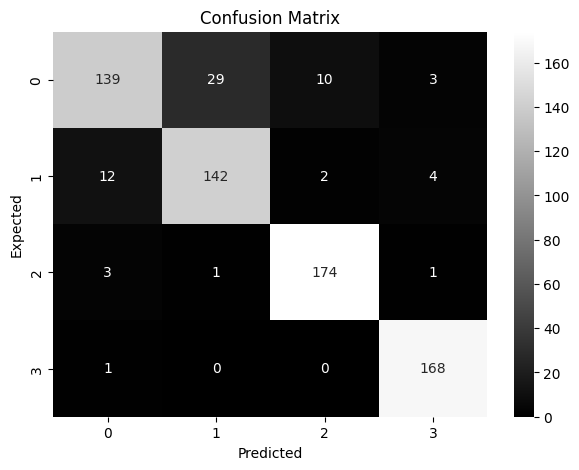

In [ ]:
# Generate confusion matrix
cm = metrics.confusion_matrix(expected, predicted)

# Plot confusion matrix in black and white
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='gray')

# Set background color to white
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


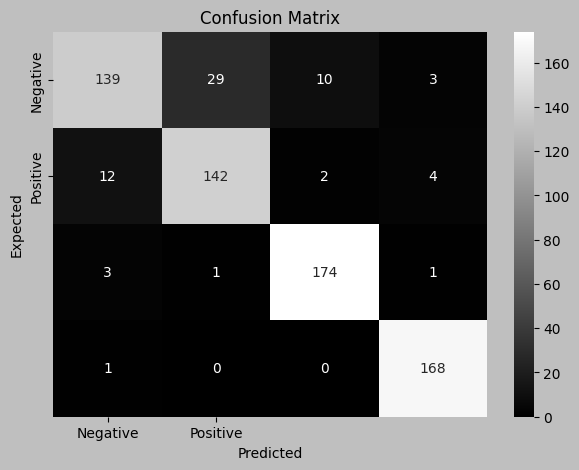

In [ ]:
# Generate confusion matrix
cm = metrics.confusion_matrix(expected, predicted)

# Plot confusion matrix in black and white
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='gray', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


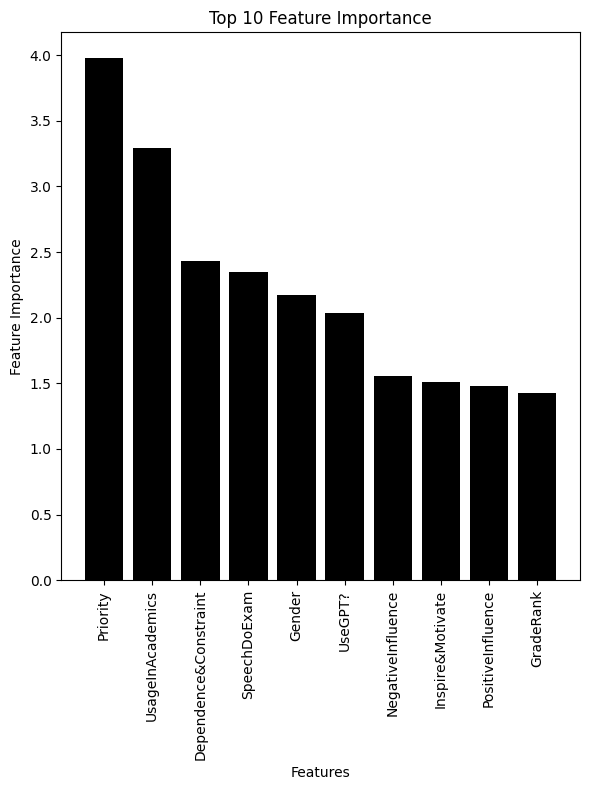

In [ ]:
import matplotlib.pyplot as plt

# Data
importance = final_model.get_score(importance_type='gain')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
top_10_features = sorted_importance[:10]

features = [item[0] for item in top_10_features]
values = [item[1] for item in top_10_features]


# Plot
plt.figure(figsize=(6, 8))
plt.bar(features, values, color='black')  # Change to vertical bars
plt.xlabel('Features')
plt.ylabel('Feature Importance')
# Set background color to white
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')
plt.title('Top 10 Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
